# The `Titanic` dataset

Go to the following `kaggle` webpage [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

If you don't have a `kaggle` account, create one.

Download the `train.csv` dataset.

Answer the following questions using the libraries `pandas`, `seaborn` and/or any other library that you like.
We expect you to produce **nice looking plots**, at least **readable** and perform the required computations
 as concisely as possible using the `pandas` API. This is the way we will evaluate this homework.

Before boarding on the homework, import (install them if needed)
the next modules.




In [328]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import pdpipe as pdp

import requests

import re
import os
from collections import namedtuple
from collections import abc
from statsmodels.graphics.mosaicplot import mosaic

sns.set_context("notebook", font_scale=1.2)

The first thing to do is to read the description of
the columns and understand what the dataset is about and what it contains.

## Question : inspecting a DataFrame

Open the dataframe with `pandas`, check the first lines of the dataset

### Answer

In [329]:
df = pd.read_csv('train.csv')

#df.head(1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



Method `info`  print a a concise summary of a `DataFrame`.
With optional parameter `memory_usage`, you can get an estimate
of the amount of memory used by the `DataFrame`. Beware that
the resulting estimate depends on the argument fed.



In [330]:
df.info()
#df.memory_usage(index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



## Question: Checking the types of columns

Check the types of the columns.

- How do you obtain the type of a column?
- How do you obtain the datatype (`dtype`) of elements of a column?

### Answer



In [332]:
print(df.dtypes) #type of columns
df['Name']

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

### Question: selecting columns according to datatype

Project (in the SQL sense)  the DataFrame on columns with a specified datatype.
For example, project (as in the SQL `SELECT`)
the Titanic `DataFrame` on the  numerical columns.

Hint: method `select_dtypes`

### Answer


In [333]:
df.select_dtypes(include='int')

#df.select_dtypes(include='float')

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0



## Question: computing number of distinct values in each column

For each column with non-numerical datatype compute the number of unique values
in the column.

### Answer



In [334]:
def computing(df):
    dic={}
    for i in df.columns :
        dic[i]=len(pd.unique(df[i]))
    return dic
computing(df)


{'PassengerId': 891,
 'Survived': 2,
 'Pclass': 3,
 'Name': 891,
 'Sex': 2,
 'Age': 89,
 'SibSp': 7,
 'Parch': 7,
 'Ticket': 681,
 'Fare': 248,
 'Cabin': 148,
 'Embarked': 4}


## Question: spotting categorical columns

What are the indices and column names of columns
with less than `10` distinct vakues ?

### Answer



In [335]:
def compte(df):
    dic=computing(df)
    dic1={}
    for i in df.columns:
        if(dic[i])<10:
            dic1[i]=dic[i]
    return dic1
compte(df)

{'Survived': 2, 'Pclass': 3, 'Sex': 2, 'SibSp': 7, 'Parch': 7, 'Embarked': 4}


## Question: coercing column datatypes

- `Name` should be of type `string`
- `Sex` is a categorical variable with values `Female, Male, None`
- `Embarked` is a categorical variable with values `Cherbourg, Southampton, ..., None`
- `Ticket` should be a string
- `Cabin` should be a string
- `Survived` should be of type `bool`
- `Pclass` is a categorical variable (ordered)
- `Sibsp` could a categorical variable (ordered)
- `Parch` could a categorical variable (ordered)

Attempt to automatically infer better types fails.




### Answer



In [337]:
df['Sex'] = df['Sex'].astype('category')
#df['Ticket'] = df['Ticket'].astype('str')
#df['Cabin'] = df['Cabin'].astype('str')
df['Cabin'] = df['Cabin'].astype(str,skipna=True)
df['Ticket'] = df['Ticket'].astype(str,skipna=True)
df['Name'] = df['Name'].astype('str')
df['Embarked'] = df['Embarked'].astype('category')
df['Survived'] = df['Survived'].astype('bool')

df.dtypes

PassengerId       int64
Survived           bool
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


## Question: coercing column datatypes

All suspicious columns could be converted to `category`.
Some of the categories have to be ordered.


### Answer


In [338]:
df['Pclass'] = pd.Categorical(df['Pclass'],ordered=True)
df['SibSp'] = pd.Categorical(df['SibSp'],ordered=True)
df['Parch'] = pd.Categorical(df['Parch'],ordered=True)



## Question: categorizing columns using functions

Define a function that takes as arguments a `Dataframe` and a list of
of column names and attempts to cast the corresponding columns to 'category'.

### Answer




In [339]:
def categoriz (a,l):
    for i in l :
        a[i] = a[i].astype('category')
    print(a.dtypes)
    
categoriz(df,['Sex','Embarked'])


PassengerId       int64
Survived           bool
Pclass         category
Name             object
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object



## Question: enforcing datatypes at loading time


Function `read_csv` from `Pandas` has many optional keyword arguments that
can be used to tweak the resulting `Dataframe` during (or just after load).

Improve your import of the data: for instance,
categorical columns (a column with a small number of modalities)
should have the `category` type.

### Answer


In [340]:
k_dtypes={
'PassengerId': np.int,
'Survived' : bool,
'Pclass' :'category',
'Name' :str,
'Sex' :'category',
'Age' : np.float,
'SibSp' : 'category',
'Parch' : 'category',
'Ticket': str,
'Fare' : np.float,
'Cabin' : str,
'Embarked': 'category'
}

df=pd.read_csv('train.csv',dtype=k_dtypes)

## Question: Count the number of missing values in each column

Display the distribution of `Pclass`  and `Cabin == NaN` in
the subpopulation defined by the missingness of `Age`.

Hint: you may use function `mosaic` from package `statsmodels`. See 
`from statsmodels.graphics.mosaicplot import mosaic`

### Answer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


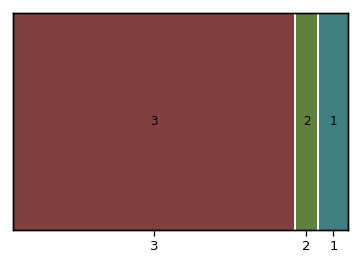

In [341]:
subpo=df[df['Age'].isnull()][['Pclass','Cabin']]
subpo=subpo[df['Cabin'].isnull()]
mosaic(subpo,['Pclass'])
plt.show()



## Question: number of missing values per row

It is also possible to determine the number of NA values per row.
List the rows with at least two missing values. Can you complete
some dots?

### Answer

In [343]:
n = df.isna().sum(axis=1)
#print(n)
n = n[n>=2].index.values #indices of lines that have missing values greater than or equal to two
print(n)
#nn = df.iloc[n]
#print(nn)


[  5  17  19  26  28  29  32  36  42  45  46  47  48  64  65  76  77  82
  87  95 101 107 109 121 126 140 154 158 159 168 176 180 181 186 196 198
 201 214 223 229 235 240 241 250 256 260 264 270 274 277 295 300 301 304
 306 324 330 334 335 347 354 358 359 364 367 368 375 384 388 409 410 411
 413 415 420 425 428 431 444 451 454 459 464 466 468 470 481 485 490 495
 497 502 507 511 517 522 524 531 533 538 547 552 557 560 563 564 568 573
 578 584 589 593 596 598 601 602 611 612 613 629 633 639 643 648 650 653
 656 667 674 680 692 697 709 718 727 732 738 739 760 766 768 773 778 783
 790 792 793 825 826 828 832 837 846 859 863 868 878 888]


### 
## Question: describe, showing quintiles

For each numerical column, show the *quintiles* (from $20\%$ up to $80\%$).

### Answer



In [344]:
print(np.quantile(df['Age'], [ 0.20, 0.5, 0.75, 0.8]))
print(np.quantile(df['Age'], [ 0.20, 0.5, 0.75, 0.8]))
print(np.quantile(df['Fare'], [ 0.20, 0.5, 0.75, 0.8]))
print(np.quantile(df['PassengerId'], [ 0.20, 0.5, 0.75, 0.8]))
#print(np.quantile(df['Pclass'], [ 0.20, 0.5, 0.75, 0.8]))
#print(np.quantile(df['Parch'], [ 0.20, 0.5, 0.75, 0.8]))
#print(np.quantile(df['SibSp'], [ 0.20, 0.5, 0.75, 0.8]))

[nan nan nan nan]
[nan nan nan nan]
[ 7.8542 14.4542 31.     39.6875]
[179.  446.  668.5 713. ]




## Question: binning the `Age` column

Create a new categorical column named `Status`.

The value should be should depend on the `Age`
column with bins  `[0,17], (17, 40], (40, 60], (60, 100]`
(`np.nan` for passengers whose age is unknown).

### Answer




In [345]:
df['Status']=pd.Categorical

def categ(df):
    for i in range (len(df)) :
        if (0.0 <=  df.Age[i] <= 17.0) :
            df.Status[i]='ado'
        elif (17.0 < df.Age[i] <= 40.0) :
            df.Status[i]= 'Adultes'
        elif (40.0 < df.Age[i] <= 60.0) :
            df.Status[i]='Adultes++'
        elif (60.0 < df.Age[i] <= 100.0) :
            df.Status[i]='Ainés'
        else :
            df.Status[i]= np.nan
    return(df)
categ(df)
df['Status'] = df['Status'].astype('category')

df.head(60)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adultes
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adultes
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adultes
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adultes
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adultes
5,6,False,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adultes++
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,ado
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adultes
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,ado



## Question: 

Draw a `countplot` for each categorical column, arrange the `countplot`s in a grid 
with two rows and three columns.

### Answer

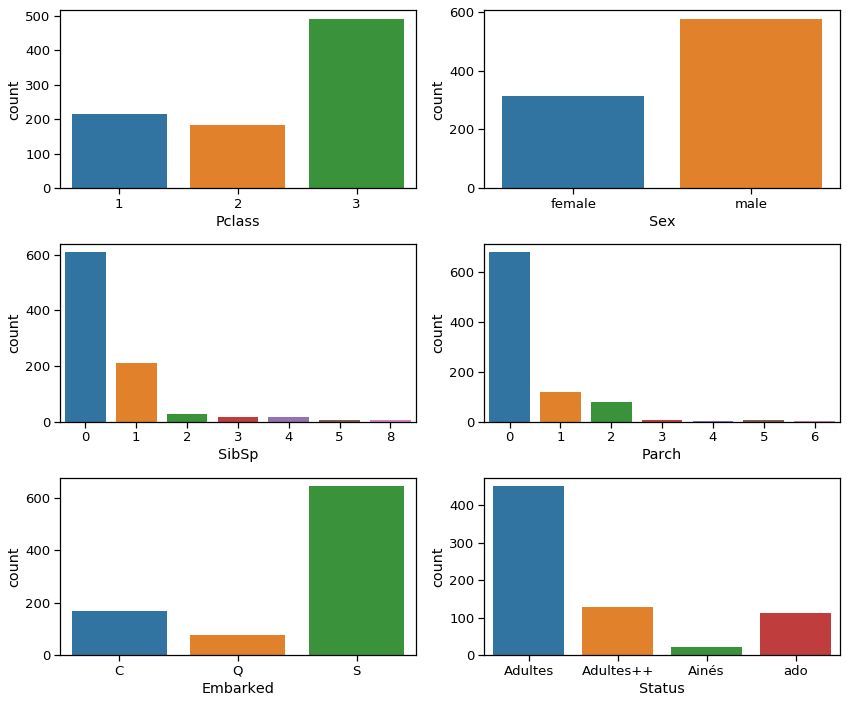

In [346]:
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
columns = df.select_dtypes("category")

for i, colname in enumerate(columns): 
     sns.countplot(colname, data=df ,ax=fig.axes[i])
plt.tight_layout()







## Question: plotting the distribution of numerical columns

For each column for which it makes sense, display its distribution using `seaborn`:
choose the most relevant type of plot for each column and display it.

**Remark.** Note that the `Age` column contains missing values:
show the number of missing / non-missing values in this column, and show the distribution of non-missing ages in a different plot.
Also, note that there is a `notna()` method for dataframes...

### Answer


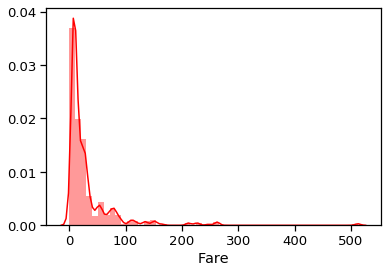

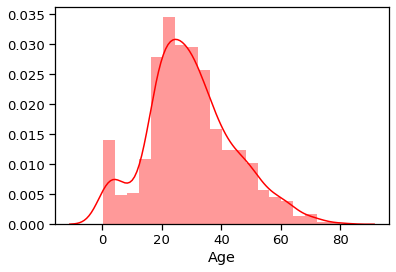

In [348]:
fr=sns.distplot(df.Fare,hist=True,color="r")#plot of Fare column distribution
plt.show()
h=df.Age.isnull().sum()#number of missing values
#print(h)
t=df.Age.notna().sum()# number of non-missing values
j=df.Age.notna()
j=j[j==True].index.values
#print(j)
k=df.Age[j]
sns.distplot(k,hist=True,color="r")#plot of Age column distribution with non missing values
plt.show()




## Question: plot numerical columuns according to categorical columns

Do the same as in Question 4,
but **differentiate** the plots
for passengers the passengers that survived and the ones who did not.
You can use the `hue` option,
you can use a `FacetGrid`.
Look at the `seaborn` documentation and choose the best option.

### Answer

#### Facets



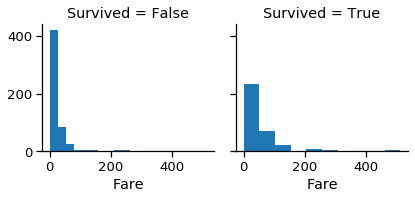

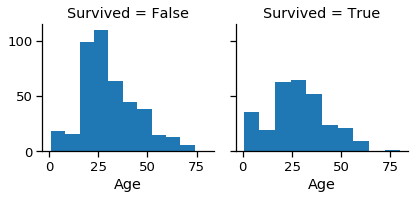

In [349]:
tt= sns.FacetGrid(df, col="Survived")
tt.map(plt.hist, "Fare")
plt.show()

jj= sns.FacetGrid(df, col="Survived")
jj.map(plt.hist,"Age")
plt.show()

#### Boxplot

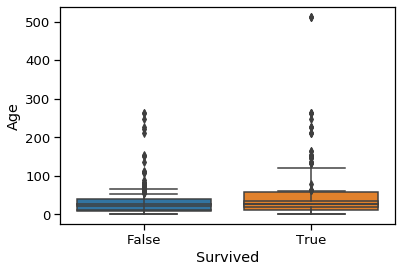

In [350]:
ax = sns.boxplot(x=df.Survived,y=df.Fare)

ax = sns.boxplot(x=df.Survived,y=df.Age)

#### Catplot

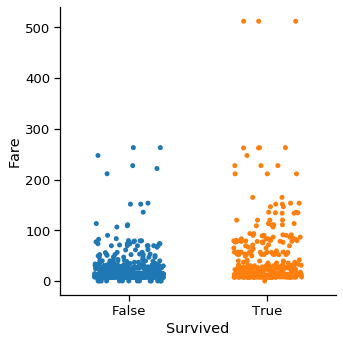

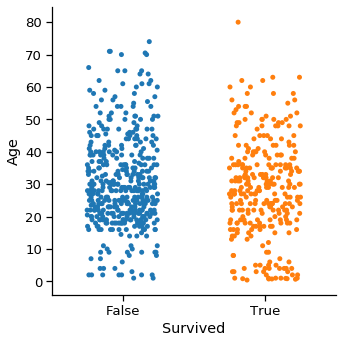

In [351]:
sns.catplot(x='Survived', y='Fare', 
            data=df,jitter='0.25')
sns.catplot(x='Survived', y='Age', 
            data=df,jitter='0.25')




## Question: categorical plots, barplots

The `Titanic`  dataset may be compared with datasets generated by
*surveys* (*questionnaires*). In such datasets, each row correspond
to an individual. An individual is described by *demographic* variables
and *attitudinal/response* variables. Here, `Age, Sex, Pclass, Embarked, ...`
are considered as demographic variables while `Survived` is
regarded as an attitudinal/response variable. It is desirable to plot the response
variable as a function of (some of) the demographic variables.
All variables are categorical.

### Answer



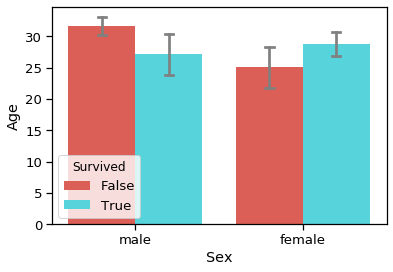

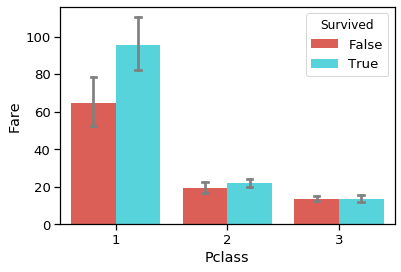

In [352]:
mm=sns.barplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 10,             
            errcolor = 'gray',)
plt.show()

xx=sns.barplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 10,             
            errcolor = 'gray',)
plt.show()


Barplots do not give us hints about the size of the different sub-populations.


## Question: categorical plots, mosaicplots



You have drawn a `boxplot` of `Age` with respect to passenger class (`Pclass`).
It would be nice to complement the plot with an indication of the number of missing values.
It would also make sense to indicate the number of individuals in each subsample.

Mosaicplot as delivered by module `statsmodels` is a very
powerful tool to visualize *contingency tables*.

A *two-way contingency table* and the associated `mosaicplot` reveal that
the passengers who boarded in the three harbors (Southampton, Cherbourg, Q)
did not buy the same kind of tickets. Half of the passengers embarked at Cherbourg
travelled first class while at most one fourth of the passengers embarked
at Southampton did.

### Answer



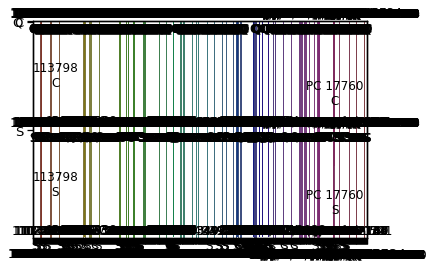

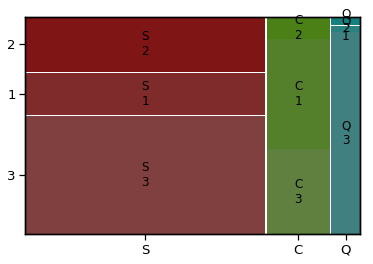

In [353]:
mosaic(df,['Ticket','Embarked'])
plt.show()

mosaic(df,['Embarked','Pclass'])
plt.show()


## Question: three-way mosaicplots

A three-way contingency illustrate the association between `Sex`, `Pclass`
and `Survived`.

### Answer



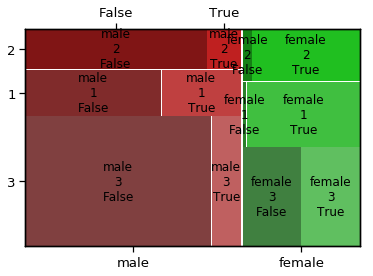

In [354]:
mosaic(df,['Sex','Pclass','Survived'])
plt.show()


## Question: roommates

For each passenger, compute the number of passengers in the same cabin (including himself).
Add a column called `Roommates` that contain this information.
When the cabin information is missing, then the `Roommates` is missing as well.
You will need to use `groupby` and `join` operations.



**Warning.** You should not `reset_index` after the `groupby` operation if you `join` with the resulting dataframe.


We may proceed by projecting on columns
`PassengerId,  and `Cabin` while filtering (selecting) the rows
where `Cabin` is available. This is the `df_cabin` dataframe below.





- Plot `Roommates` according to `Pclass`
- Plot `Roommates` according to `Embarkment`
- Plot `Roommates` according to `Sex`

### Answer

In [355]:
cab=df.groupby(['Cabin']).count()['PassengerId']
cab
cab.name="Roommates"
df=df.join(cab,on='Cabin')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adultes,NaN
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adultes,1.0
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adultes,NaN
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adultes,2.0
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adultes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adultes,NaN
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adultes,1.0
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adultes,1.0


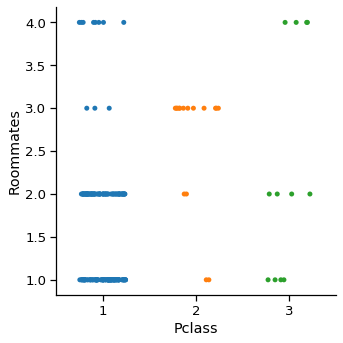

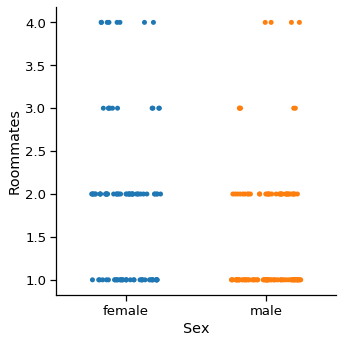

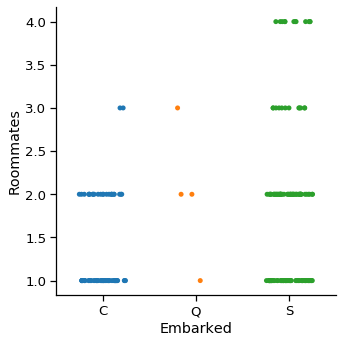

In [356]:
sns.catplot(x='Pclass', y='Roommates', 
            data=df,jitter='0.25')
plt.show()
sns.catplot(x='Sex', y='Roommates', 
            data=df,jitter='0.25')
plt.show()
sns.catplot(x='Embarked', y='Roommates', 
            data=df,jitter='0.25')
plt.show()



## Question: plotting  `RoomMates` column.


### Answer



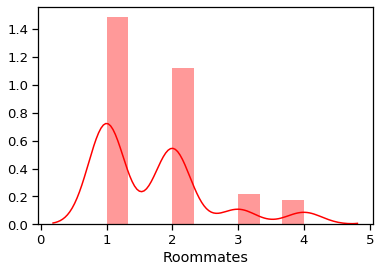

In [357]:

x=df.Roommates.notna()
x=x[x==True].index.values
#print(x)
v=df.Roommates[x]
sns.distplot(v,hist=True,color="r")#plot of Roommates column distribution with non missing values
plt.show()



## Question: surviving together

Is there a cabin where some passengers survived while others did not?


### Answer



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adultes,NaN
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adultes,1.0
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adultes,NaN
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adultes,2.0
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adultes,NaN
5,6,False,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adultes++,1.0
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,ado,NaN
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adultes,NaN
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,ado,NaN


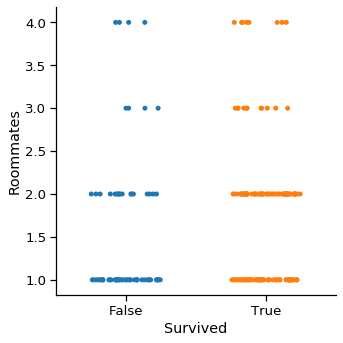

In [358]:
sns.catplot(x='Survived', y='Roommates', 
            data=df,jitter='0.25')
df.head(10)



## Question: Missing `Cabin`  value and `Age`


The `Cabin` column is `NaN` for many rows, how are
those missing data distributed acrross the classes?

Plot the age distribution with
respect to the availability of the `Cabin` column (`Cabin.isna()`).

### Answer




## Question: Milking the `Name` column

Column `Name` gathers different kind of information pertaining
to a passenger: name, civility,
and given name(s). For some female passengers, the apparent given names
are actually the husband's name and the maidens name is indicated between
parentheses.

The information contained in the `Name` column Has to be extracted in a proper way:
The string should be into three parts: the first one containing the name,
the second one containing the civility  and, the last one
possibly containing given names or given names plus maiden names. Passing is
facilitated by the next observation: the name is followed by a comma, the
civility is followed by a period. You may use regular expressions
as providede by  module `re`  or module `regex`.


- Split the information contained in `Name` into three columns `Name`, `Given_names`, and `Civility`.
- Go one step further. Extract the *maiden name* and actual *given names* when information available.

At the end of the day, column `Name` should contain the *maiden name* for married female passengers
Column `Given_Names` should contain the real given names of the passenger, not the ones of the spouse.

To learn more about Regular Expressions see the documentation
of the [`re` module](https://docs.python.org/3/library/re.html#module-re)
and the tutorial [Howto](https://docs.python.org/3/howto/regex.html#regex-howto)

Understand the difference between a `string` and a `raw string`.



In [359]:
print(r"\n is not a newline", "\nis a newline\n", "\\\\n is not a newline\n")


\n is not a newline 
is a newline
 \\n is not a newline




### Answer



In [360]:
def parse_name(s):
    """Parse name field in Titanic data frame.

    ACHTUNG: there are some outliers with given names containing parenthsized items. Some people travelled under pseudonyms (see [Henry Samuel Morley](https://www.encyclopedia-titanica.org/titanic-victim/henry-samuel-morley.html)).
    """
    name = s
    civility, Spouse_name, Maiden_name = None, None, None

    # TODO:
    
    return {'Name': name,
            'Civility': civility,
            'Given_names': given_names,
            'Spouse_name': Spouse_name,
            'Maiden_name': Maiden_name}




## Question: about `map` objects

What is a `map object`? Is it a sequence (list, tuple, etc)? Is it
an `Iterable`? Something else? You may use function `isinstance` and
submodule `collections.abc` to settle these questions?

### Answer

* Map object is iterable, we can convert map object to a list


## Question: aristocrats on board

Some passengers were of noble extraction, or officers in some Army.
Point them.

### Answer




## Question: How many people are given Civility 'Mrs', 'Miss', 'Mr', 'Master'?


### Answer




ACHTUNG: there are some outliers with given names containing parenthsized items. Some people travelled under pseudonyms (see [Henry Samuel Morley](https://www.encyclopedia-titanica.org/titanic-victim/henry-samuel-morley.html)).





## Question:  For each embarkment and sex, visualize the survival ratio.


### Answer




## Question: for each `Pclass` and `Sex`, visualize the survival ratio,

### Answer





## Question: compute pairwise correlations between numerical columns.


### Answer



In [361]:
print(np.corrcoef(df.PassengerId, df.Fare))
print(np.corrcoef(df.PassengerId, df.Age))
print(np.corrcoef(df.PassengerId, df.Roommates))

[[1.         0.01265822]
 [0.01265822 1.        ]]
[[ 1. nan]
 [nan nan]]
[[ 1. nan]
 [nan nan]]




## Pandas and SQL

A systematic comparison between Pandas and SQL querying can be found
at
[https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)


## Pandas pipeliness

Loading and transforming datasets is a cumbersome task. It is very likely that
the sequence of transformations you have performed on the `train.csv`  dataset will
be carried out on other datasets (just think about `test.csv`). For the sake of
reproducibility, it is convenient to build a *transformation pipeline*.
The `pipe` method for `DataFrame` class provides us with a means to do that.

Pipelining DataFrame methods is easy, it is enough to write:



In [362]:
# df.meth1(arg11, arg12)\
#   .meth2(arg21)\
#   .meth3(arg31, arg32, arg33)\
#   ...



### `pipe` method for class `DataFrame`


The `pipe` method allows us to chain transformations implemented by functions.
Pipelining ordinary functions can be done using the `pipe` method of
class `DataFrame`.



In [363]:
def add(x,y):
         return x+y
def sous(x,y):
        return x-y
df.Age.pipe(add,3)\
      .pipe(sous,4)

0      21.0
1      37.0
2      25.0
3      34.0
4      34.0
       ... 
886    26.0
887    18.0
888     NaN
889    25.0
890    31.0
Name: Age, Length: 891, dtype: float64



### Module `pdpipe`

Module [`pdpipe`](https://pdpipe.github.io/pdpipe/) is more ambitious.

A *transformation pipeline* defines a sequence of operations that should be applied
to a dataframe. In the `pdpipe` framework, it is an instance of class `pdpipe.PdPipeLine`





## Question: use `pdpipe`

Build a pipeline of transformatioms
using the [pdpipe](https://pdpipe.github.io/pdpipe/doc/pdpipe/) module.

### Answer



In [364]:
import pdpipe as pdp

drop_status = pdp.ColDrop("Status")
print(drop_status)
res_df = drop_status(df)


PdPipelineStage: Drop column Status


In [365]:
plin = pdp.ColDrop("Name") + pdp.OneHotEncode("Survived")
res_df = plin(df)
res_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates,Survived_False
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adultes,NaN,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Adultes,1.0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adultes,NaN,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Adultes,2.0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Adultes,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,13.0000,NaN,S,Adultes,NaN,1
887,888,1,female,19.0,0,0,112053,30.0000,B42,S,Adultes,1.0,0
888,889,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,1
889,890,1,male,26.0,0,0,111369,30.0000,C148,C,Adultes,1.0,0




## Miscellanea

Browse the `seaborn` documentation in order to make up your
mind on the following questions.

1. What is a *hue*?
1. Is the *colorPalette* part of style?
1. What is a saturation channel?
1. What is a saturation channel made for?
1. What is an *aesthetic parameter*?
1. What is the type of `seaborn.FacetGrid`?



* 1.The hue parameter determines which column in the data frame should be used for colour encoding.


* 2.Yes, because color adds more value to the plot.


* 4.Saturation channel is used to detect colors

* 5.Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of      the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.

   Aesthetics means a set of principles concerned with the nature and appreciation of beauty, especially in art. Visualization is an art of representing data in effective and easiest possible way.

* 6. seaborn.FacetGrid is a matrix
